In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pdpbox import pdp, get_dataset,info_plots
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [155]:
file = 'heart_clean.csv'
heart_df = pd.read_csv(file)
heart_df.drop('Unnamed: 0',axis = 1,inplace = True)
heart_df.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [128]:
heart_df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [152]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    int64  
 2   chestpaintype   918 non-null    int64  
 3   restingbp       918 non-null    float64
 4   cholesterol     918 non-null    float64
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    int64  
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    int64  
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    int64  
 11  target          918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB


In [66]:
no_hd = len(heart_df[heart_df.HeartDisease == 0])
tot_hd = len(heart_df.HeartDisease)
yes_hd = len(heart_df[heart_df.HeartDisease == 1])
print("Percentage of patients with Heart Disease: {:.2f}%".format(yes_hd / tot_hd * 100 ) )
print("Percentage of patients with Heart Disease: {:.2f}%".format(no_hd / tot_hd * 100 ) )

Percentage of patients with Heart Disease: 55.34%
Percentage of patients with Heart Disease: 44.66%


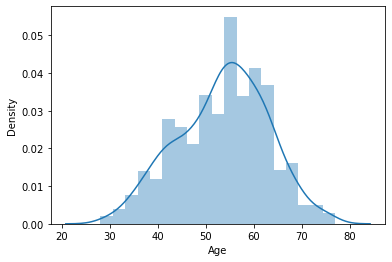

In [129]:
sns.distplot(heart_df['Age'])
plt.show()



In [130]:
tar = heart_df['HeartDisease']

In [133]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [134]:
heart_df['RestingECG'].unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'ChestPainType analysis 1-asymptomatic ,2-atypical angina,3-non-anginal pain,4-typical angina')

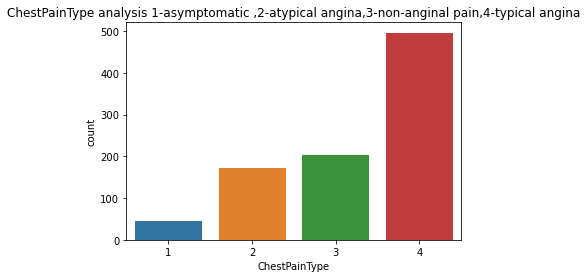

In [137]:
sns.countplot(heart_df['ChestPainType'])
plt.title("ChestPainType analysis 1-asymptomatic ,2-atypical angina,3-non-anginal pain,4-typical angina")

Text(0.5, 1.0, 'ChestPainType against Heart disease diagnosis')

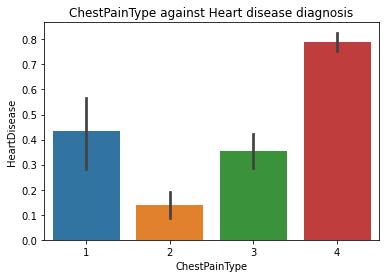

In [74]:
sns.barplot(heart_df['ChestPainType'] , tar)
plt.title("ChestPainType against Heart disease diagnosis")
#we can see that most of the patients have typical anginal chest pain whereas very few patients suffer from an asymptotic type of chest pain

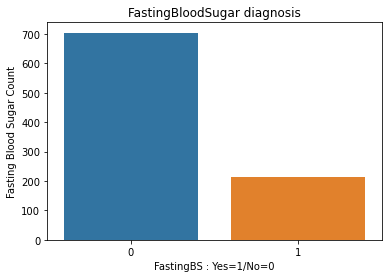

In [138]:
sns.countplot(heart_df['FastingBS'])
plt.title("FastingBloodSugar diagnosis")
plt.xlabel("FastingBS : Yes=1/No=0")
plt.ylabel("Fasting Blood Sugar Count")
tar = heart_df['HeartDisease']

Text(0, 0.5, 'Fasting Blood Sugar Count')

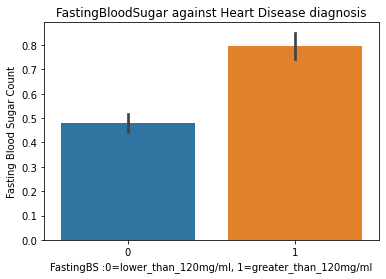

In [159]:
sns.barplot(heart_df['FastingBS'] , tar)
plt.title("FastingBloodSugar against Heart Disease diagnosis")
plt.xlabel("FastingBS :0=lower_than_120mg/ml, 1=greater_than_120mg/ml")
plt.ylabel("Fasting Blood Sugar Count")



[Text(0, 0, 'normal'),
 Text(1, 0, 'st-t_wave_abnormality'),
 Text(2, 0, 'left_ventricular_hypertrophy')]

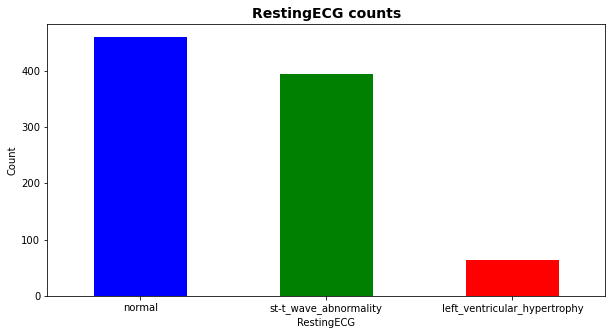

In [163]:
"""
sns.barplot(heart_df['RestingECG'] , tar)
plt.title("RestingECG against heart Disease diagnosis")
plt.xlabel("RestingECG ")
plt.ylabel("RestingECG Count")
"""

#distribution on st_slope data in our dataset
name = ["normal", "st-t_wave_abnormality","left_ventricular_hypertrophy"]
fig, ax = plt.subplots(figsize=(10,5))
ax = heart_df.ST_Slope.value_counts().plot(kind='bar',color=['blue','green','red'] )
ax.set_title("RestingECG counts", fontsize = 14, weight = 'bold')
ax.set_xlabel("RestingECG")
ax.set_ylabel("Count")
ax.set_xticklabels (name, rotation = 0)

#From the below barplot, we can easily see that people having type “1” are much more likely to have heart problems as compared to type “0” and type “2”.

[Text(0, 0, 'upsloping'), Text(1, 0, 'flat'), Text(2, 0, 'downsloping')]

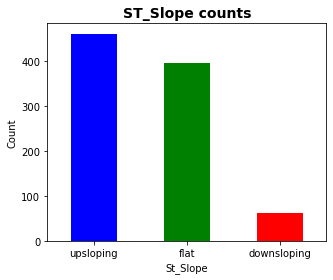

In [157]:
#distribution on st_slope data in our dataset
name = ["upsloping", "flat","downsloping"]
fig, ax = plt.subplots(figsize=(5,4))
ax = heart_df.ST_Slope.value_counts().plot(kind='bar',color=['blue','green','red'] )
ax.set_title("ST_Slope counts", fontsize = 14, weight = 'bold')
ax.set_xlabel("St_Slope")
ax.set_ylabel("Count")
ax.set_xticklabels (name, rotation = 0)



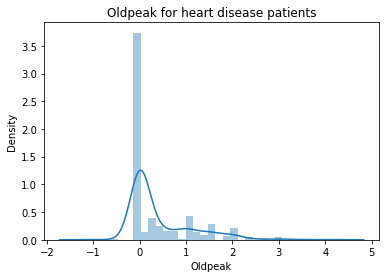

In [158]:
heart_df.columns

oldpeak_df = heart_df[heart_df['HeartDisease']==0]
sns.distplot(oldpeak_df['Oldpeak'])
plt.title("Oldpeak for heart disease patients")
plt.show()


In [148]:
heart_df = heart_df.rename(columns=lambda x: x.lower())
heart_df = heart_df.rename(columns={"heartdisease":"target"})
heart_df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'target'],
      dtype='object')

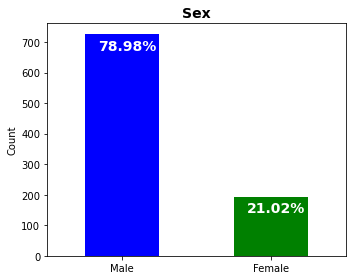

In [149]:
"""sns.countplot(x = 'sex', data = heart_df)
plt.xlabel ("sex(0 = Female, 1 = Male)")
plt.show()"""


fig, ax = plt.subplots(figsize=(5,4))
name = ["Male", "Female"]
ax = heart_df.sex.value_counts().plot(kind='bar',color=['blue','green'] )
ax.set_title("Sex", fontsize = 14, weight = 'bold')

ax.set_ylabel("Count")
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


1    508
0    410
Name: target, dtype: int64


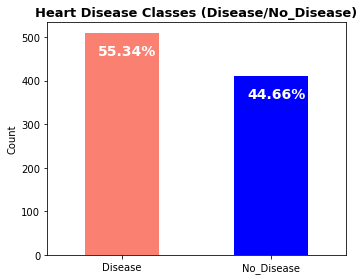

In [150]:
print(heart_df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = heart_df.target.value_counts().plot(kind='bar',color=['salmon','blue'] )
ax.set_title("Heart Disease Classes (Disease/No_Disease)", fontsize = 13, weight = 'bold')

ax.set_ylabel("Count")
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()